In [39]:
import os
import numpy as nmp
import pandas as ps
import matplotlib.pyplot as mapp
import matplotlib
font = {'family' : 'Cambria',
            'weight' : 'bold',
            'size'   : 17}
matplotlib.rc('font', **font)

In [40]:
def loaddir():
    filelist=os.listdir()
    operational=[]
    for f in filelist:
        if "CashManagement" in f or "Rolling" in f:
            operational.append(f)
    return operational

In [41]:
def combineandread(flst):
    fldfs=[]
    for f in flst:
        fldfs.append(ps.read_csv(f))
    df=ps.concat(fldfs)
    return df

In [42]:
alldt=loaddir()
cash=combineandread(alldt)
cash.head()

,InvoiceMonth,MeatIndustryCash,MiscAndMilkIndustryCash,RadiologicalCash,GovernmentCash
0,2021-11,"1,744,994","2,419",607,"301,415"
1,2021-12,"2,869,810","2,717","62,764","399,137"
2,2022-01,"2,757,269","2,444","227,488","523,634"
3,2022-02,"1,997,110","5,829","31,939","253,595"
4,2022-03,"2,742,783","4,097","61,797","584,661"


In [43]:
def dataprep(dt):
    inv=dt.InvoiceMonth.tolist()
    mnths=["January", "February", "March", "April", "May", "June", 
           "July", "August", "September", "October", "November", "December"]
    allmn,allyr=[],[]
    for i in range(len(inv)):
        comps=inv[i].split("-")
        allyr.append(comps[0])
        mn=mnths[int(comps[1])-1]
        allmn.append(mn)
    try:
        dt.insert(0,"Year",allyr)
        dt.insert(1,"Month",allmn)
        dt=dt.drop('InvoiceMonth',axis=1)
    except:
        pass
    old_data=[dt.MeatIndustryCash.tolist(),dt.MiscAndMilkIndustryCash.tolist(),dt.RadiologicalCash.tolist(),dt.GovernmentCash.tolist()]
    new_data=[[],[],[],[]]
    for j in range(len(new_data)):
        for y in range(len(old_data[0])):
            if type(old_data[j][y])==str:
                new_data[j].append(int(''.join(old_data[j][y].split(","))))
            else:
                new_data[j].append(old_data[j][y])
    dt['MeatIndustryCash']=new_data[0]
    dt['MiscAndMilkIndustryCash']=new_data[1]
    dt['RadiologicalCash']=new_data[2]
    dt['GovernmentCash']=new_data[3]
    return dt

In [44]:
cash=dataprep(cash)
cash1=cash.sort_values(by=["Year","Month"])
cash1.head()

,Year,Month,MeatIndustryCash,MiscAndMilkIndustryCash,RadiologicalCash,GovernmentCash
0,2021,April,2549560.45,1300.05,22034.61,429840.05
2,2021,April,2549560.45,1300.05,22034.61,429840.05
3,2021,April,2549560.45,1300.05,22034.61,429840.05
1,2021,April,2549560.45,1300.05,22034.61,429840.05
4,2021,August,2552492.61,19593.00,7432.07,234127.18


In [45]:
def cash_line_plot(dt,ft,ftnm):
    yrs=[dt[dt['Year']=="2021"],dt[dt['Year']=="2022"]]
    mnu=[yrs[0].Month,yrs[1].Month] 
    mapp.figure(figsize=(9,4))
    mapp.title("Cash Receipt for {} in Food Standards (UK)".format(ftnm),fontsize=20,color="b")
    mapp.plot(mnu[0],yrs[0][ft],"--*y",label="2021")
    mapp.plot(mnu[1],yrs[1][ft],"--*m",label="2022")
    mapp.xticks(rotation=90)
    mapp.legend(loc='upper left')
    mapp.grid()
    mapp.show()

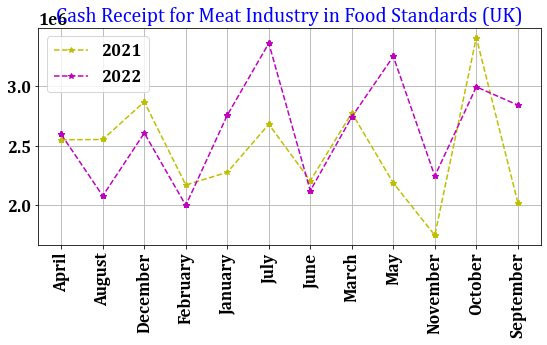

In [46]:
cols=["Meat Industry","Misc and Milk Industry","Radiological","Government"]
actcol=["MeatIndustryCash","MiscAndMilkIndustryCash","RadiologicalCash","GovernmentCash"]
cash_line_plot(cash1,actcol[0],cols[0])

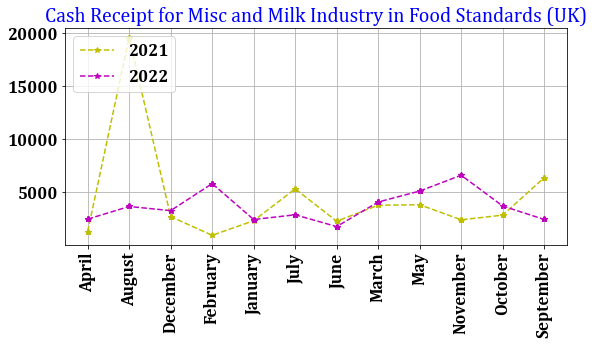

In [47]:
cash_line_plot(cash1,actcol[1],cols[1])

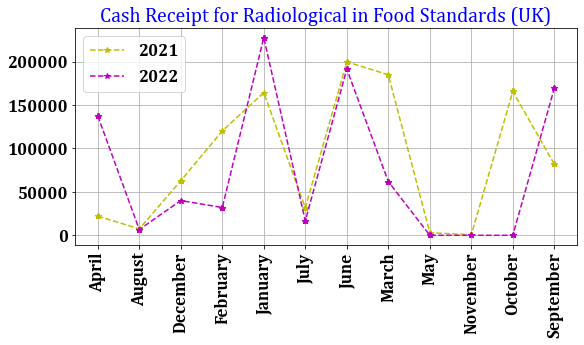

In [48]:
cash_line_plot(cash1,actcol[2],cols[2])

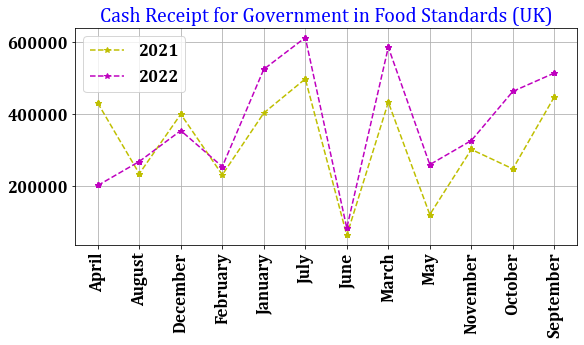

In [49]:
cash_line_plot(cash1,actcol[3],cols[3])

In [63]:
def cash_bar_plot(dt,fet,nm):
    fet='MeatIndustryCash'
    mnths=["January", "February", "March", "April", "May", "June", 
               "July", "August", "September", "October", "November", "December"]
    val21,val22=[],[]
    for m in range(len(mnths)):
        subdt=cash1[cash1['Month']==mnths[m]][['Year','Month',fet]]
        val21.append(round(subdt[subdt['Year']=='2021'][fet].mean(),2))
        val22.append(round(subdt[subdt['Year']=='2022'][fet].mean(),2))
    valrng=nmp.arange(len(mnths))
    wd = 0.3
    fig, ax = mapp.subplots(figsize=(8,4))
    bar1 = ax.bar(valrng - wd, val21, wd, label='2021',color="g")
    bar2 = ax.bar(valrng, val22, wd, label='2022',color="b")
    ax.plot(val21,"--g")
    ax.plot(val22,"--b")
    ax.set_ylabel('Count',fontsize=16,color="m")
    ax.set_title('Cash Receipt by Months for {}'.format(nm),fontsize=20,color="m")
    ax.legend(loc='best')

    fig.tight_layout()
    mapp.grid()
    mapp.xticks(valrng, mnths,rotation=90)
    mapp.show()

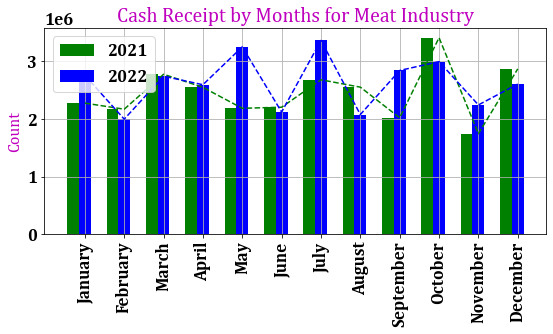

In [64]:
cash_bar_plot(cash1,actcol[0],cols[0])

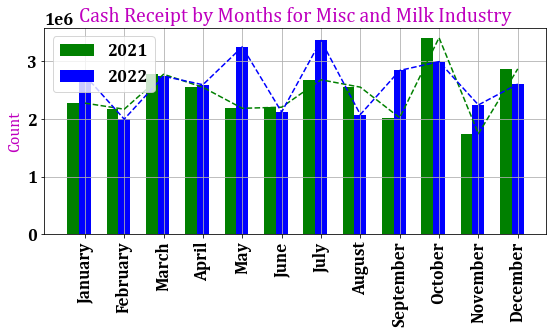

In [65]:
cash_bar_plot(cash1,actcol[1],cols[1])

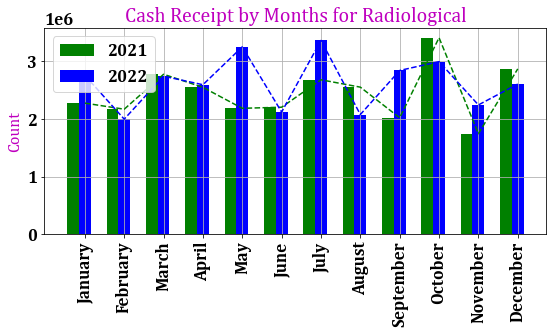

In [66]:
cash_bar_plot(cash1,actcol[2],cols[2])

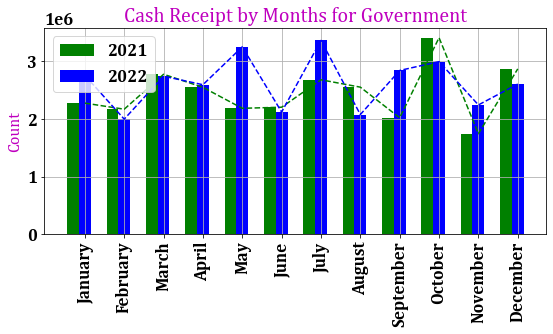

In [67]:
cash_bar_plot(cash1,actcol[3],cols[3])

In [74]:
def cash_box_plot(dt,yr,dtfets,ftnms):
    yr=str(yr)
    dt=dt[dt['Year']==yr]
    bxft = [dt[dtfets[0]], dt[dtfets[1]],dt[dtfets[2]], dt[dtfets[3]]]
    fig, ax = mapp.subplots(figsize=(8,4))
    ax.set_title("Total Cash Receipt Statistics in {}".format(yr),fontsize=22,color="m")
    box = ax.boxplot(bxft, notch=True, patch_artist=True)
    mapp.xticks([1, 2,3,4], ftnms)
    colors = ['g','y','c','b']
    for bxp, bxcl in zip(box['boxes'], colors):
        bxp.set_facecolor(bxcl)
    mapp.xlabel("Domain of Cash Receipt",fontsize=18,color="m")
    mapp.ylabel("Cash Receipt",fontsize=18,color="m")
    mapp.xticks(rotation=90)
    mapp.grid()
    mapp.show()

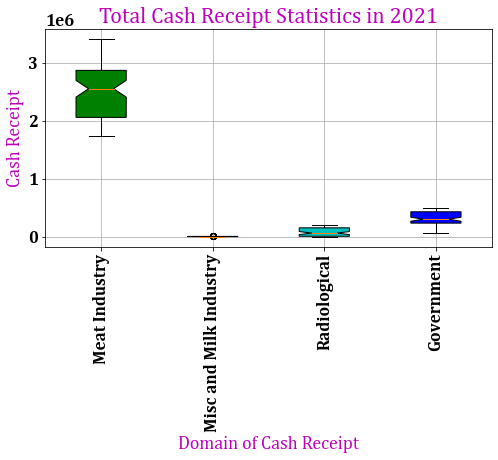

In [75]:
cash_box_plot(cash1,'2021',actcol,cols)

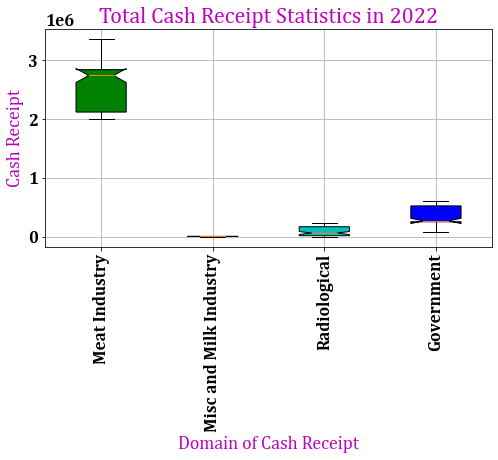

In [76]:
cash_box_plot(cash1,'2022',actcol,cols)